### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
!pip install plotly --upgrade --quiet

In [3]:
#Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from plotly import graph_objects as go

%matplotlib inline

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('coupons.csv') # Read the data in .csv format

In [5]:
data.head() #Get a peek of the data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### Data Preprocessing & Cleaning with Pandas

In [6]:
data.columns #Check the columns in the data

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [7]:
data.info() #Get details on the data - how many nulls, columns, datatypes etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

We see that most features are categorical and a few are numeric. Some features have null values as well.

**2. Investigate the dataset for missing or problematic data.:**

In [8]:
#To determine the distribution of 'Accepted' and 'Rejected' coupon
Y_counts = data.groupby('Y').Y.count()
print("Accepted coupon: ", Y_counts[1], ',', round((Y_counts[1]/data.shape[0] * 100), 2), '%')
print("Rejected coupon: ", Y_counts[0], ',', round((Y_counts[0]/data.shape[0] * 100), 2), '%')
#Y_counts

Accepted coupon:  7210 , 56.84 %
Rejected coupon:  5474 , 43.16 %


This dataset has 57% acceptance and a rejection percent of 43%.

3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
data.shape #How many rows and columns?
print("There are {} rows and {} columns.".format(data.shape[0], data.shape[1]))

There are 12684 rows and 26 columns.


We need to check if the data has **duplicates**.

In [10]:
duplicate = data[data.duplicated()] #Are there any duplicates?
data = data.drop_duplicates() # Then, drop the duplicates
print("The shape of the data after the duplicates are removed: {}. There were {} rows that are removed from the data.".format(data.shape, len(duplicate)))

The shape of the data after the duplicates are removed: (12610, 26). There were 74 rows that are removed from the data.


In [11]:
# Identify the columns with missing data
nan_count = data.isna().sum().sort_values(ascending=False).reset_index(name='nan_count')

nan_columns = nan_count[nan_count['nan_count']>0] #Check for NaN's in the columns
print(f"Columns with Null values are: '{nan_columns['index'].to_list()}")
print(nan_columns)

Columns with Null values are: '['car', 'CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']
                  index  nan_count
0                   car      12502
1           CoffeeHouse        217
2      Restaurant20To50        189
3             CarryAway        150
4  RestaurantLessThan20        129
5                   Bar        107


Out of 12684 rows, there are columns`car` has `12576` missing values. Since, `car` column is not adding any value, we can delete the column.


In [12]:
data = data.drop(['car'], axis=1) #Drop column - Axis=1 indicates column

Also, the other categorical fields that have missing values are `CoffeeHouse`, `Restaurant20To50`, `CarryAway`, `RestaurantLessThan20` and `Bar`. We can impute `mode` values to these.

In [13]:
#Imputation method - Mode
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Bar'] = data['Bar'].fillna(data['Bar'].value_counts().index[0])

The column `passanger` is named incorrectly. We can rename the column.

In [14]:
data = data.rename({'passanger': 'passenger', 'CarryAway':'CarryOut'}, axis=1) #renaming the wrong column name in the dataset

In [15]:
print("Columns in the dataset are: {}".format(data.columns)) #Yes, the column is renamed to 'passenger'!

Columns in the dataset are: Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryOut',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


Let's look at the distribution of all the features in the data.

17


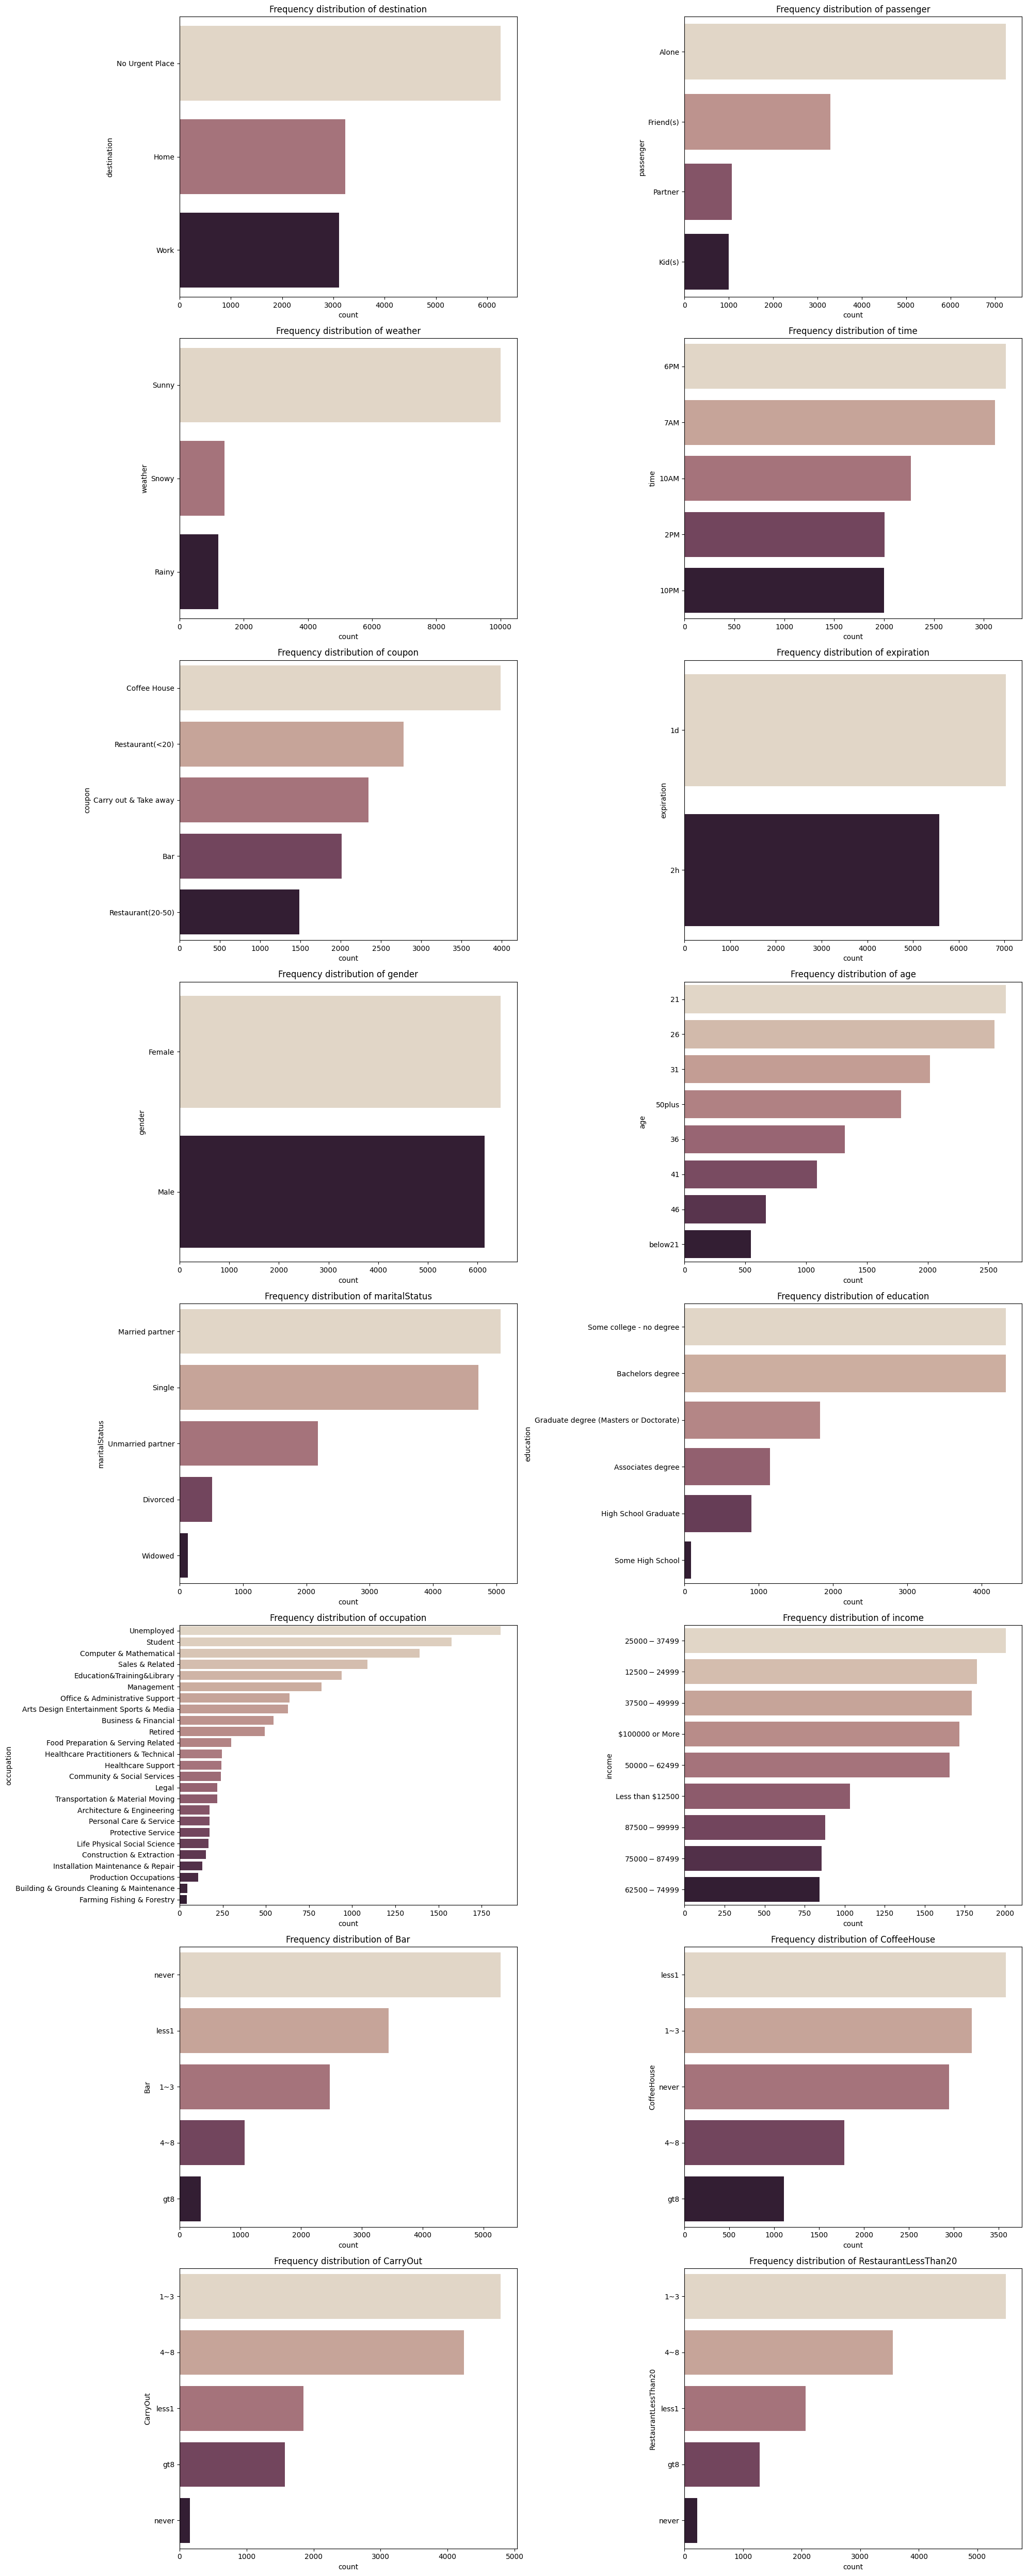

In [19]:
fig, axes = plt.subplots(8, 2, figsize=(20,50)) # Since, there are almost 17 columns, going with 9, 2 subplot
axes = axes.flatten()
print(len(data.select_dtypes('object').columns))

for ax, col in zip(axes, data.select_dtypes('object').columns): #data is categorical
    sns.countplot(y=col, data=data, ax=ax,
                  palette="ch:.25", order=data[col].value_counts().index
                  ).set(title='Frequency distribution of {}'.format(col)
                  )

plt.tight_layout()
plt.show()

From the above Countplot, the conclusions about the data made are:
- Most of the drivers are not travelling to any urgent places.
- They are either traveling Alone or with Friends.
- They are travelling/driving in Sunny weather, in the evening time mostly 6PM or at 7PM.
- Most of the coupons received are from Coffee Houses, followed by coupons of cheap restaurants (< $20).
- The expiration for most of the coupons are 1day.
- Coupons are most sent/received by Females than Males.
- Coupons are received by drivers of age 21 (or around).

**Does destination has any impact on accepting coupons, in general?**

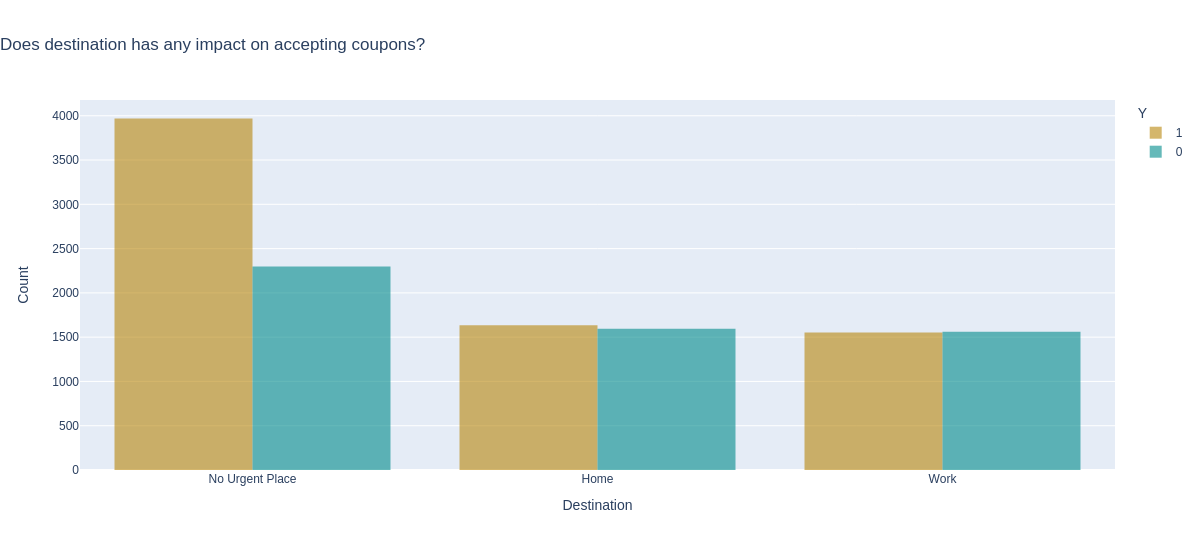

In [20]:
fig = px.histogram(data, x='destination', color='Y',
                   barmode='group',
                   color_discrete_sequence=['darkgoldenrod','darkcyan'],
                   labels={'destination': 'Destination'},
                   title="Does destination has any impact on accepting coupons?"
                   ).update_traces(opacity=0.6)

fig.update_layout(
                  title_x=0,
                  yaxis_title='Count ',
                  width=1200, height=550
                  )

fig.show("png")

Evidently, drivers who are not going to any 'Urgent Place' accept the coupons than drivers who are eithergoing Home or to Work.

**7. Considering the total data, what is the trend in Eating Out?**

In [21]:
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

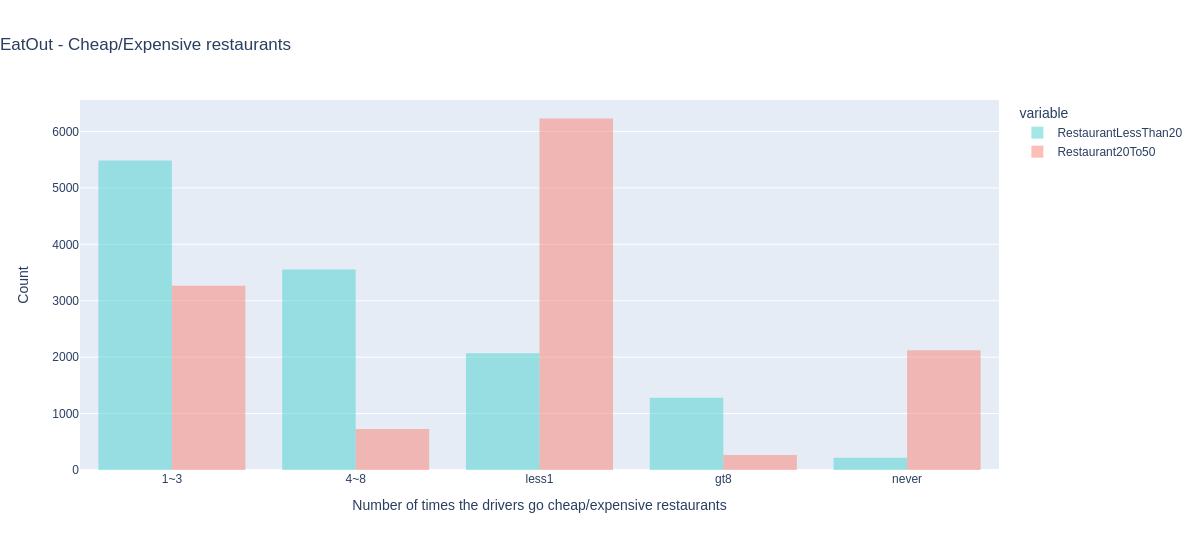

In [22]:
#Histogram to plot Eating Out
cheap_restaurant = data['RestaurantLessThan20'].value_counts()
exp_restaurant = data['Restaurant20To50'].value_counts()

combine = pd.merge(cheap_restaurant, exp_restaurant, left_index=True, right_index=True).reset_index()   # combining counts of grps for cheap and expensive restaurants
final = pd.melt(combine, id_vars=['index'], value_vars=['RestaurantLessThan20', 'Restaurant20To50'])  # unpivoting for plotting

fig = px.histogram(final, x='index', y='value', color='variable',
                   barmode='group',
                   color_discrete_sequence=['mediumturquoise','salmon'],
                   labels={'index': 'Number of times the drivers go cheap/expensive restaurants'},
                   title="EatOut - Cheap/Expensive restaurants"
                   ).update_traces(opacity=0.5)

fig.update_layout(
                  title_x=0,
                  yaxis_title='Count ',
                  width=1200, height=550
                  )

fig.show("png")

Comparing the data, it is evident that people rarely (less1 or once) go to expensive restaurants. People mostly go prefer going to cheap restaurants (`1~3` or `4~8`) times.

**4. What proportion of the total observations chose to accept the coupon?**


In [23]:
data_accepted_coupon = data[data['Y'] == 1] #data with acceptance of coupon, Y=1
data_rejected_coupon = data[data['Y'] == 0] #data with not acceptance of coupon, Y=0

#Calculate the acceptance/not accepted rate (proportion)
data_accepted_percent = len(data_accepted_coupon) / len(data)
data_notaccepted_percent = len(data_rejected_coupon) / len(data)

print(f"Proportions of Total Coupon Acceptance"
      f"\n\nAcceptance rate: {data_accepted_percent:.2%}" #format the acceptance rate to 2 decimal places
      f"\nRejection rate:  {data_notaccepted_percent:.2%}") #format the rejection rate to 2 decimal places

Proportions of Total Coupon Acceptance

Acceptance rate: 56.76%
Rejection rate:  43.24%


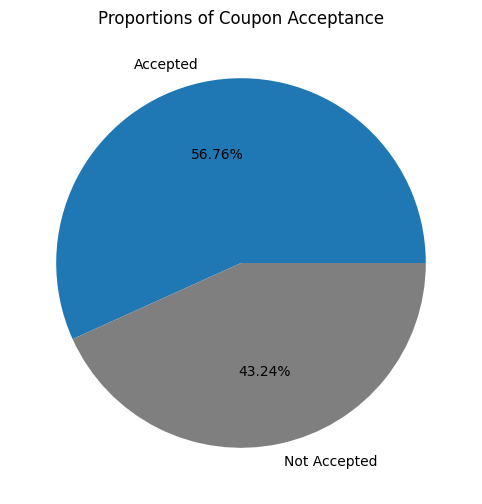

In [24]:
#Let's plot a pie chart to visualize the Coupon acceptance ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6)) #adjust the figure size
plt.pie(data['Y'].value_counts(),
        colors = ['tab:blue', 'tab:gray'],
        labels=['Accepted','Not Accepted'],
        autopct='%.2f%%'
        )

plt.title("Proportions of Coupon Acceptance")
plt.show()

**5. Use a bar plot to visualize the `coupon` column.**

In [25]:
coupon_data_df = data.groupby('coupon')['Y'].count().reset_index() #Isolating the data for the 'coupon' column & counts per coupon category.
coupon_data_df.sort_values(by='Y', ascending=False, inplace=True)
coupon_data_df

,coupon,Y
2,Coffee House,3989
4,Restaurant(<20),2779
1,Carry out & Take away,2344
0,Bar,2010
3,Restaurant(20-50),1488


Let's plot the coupon data using plotly bar plot.

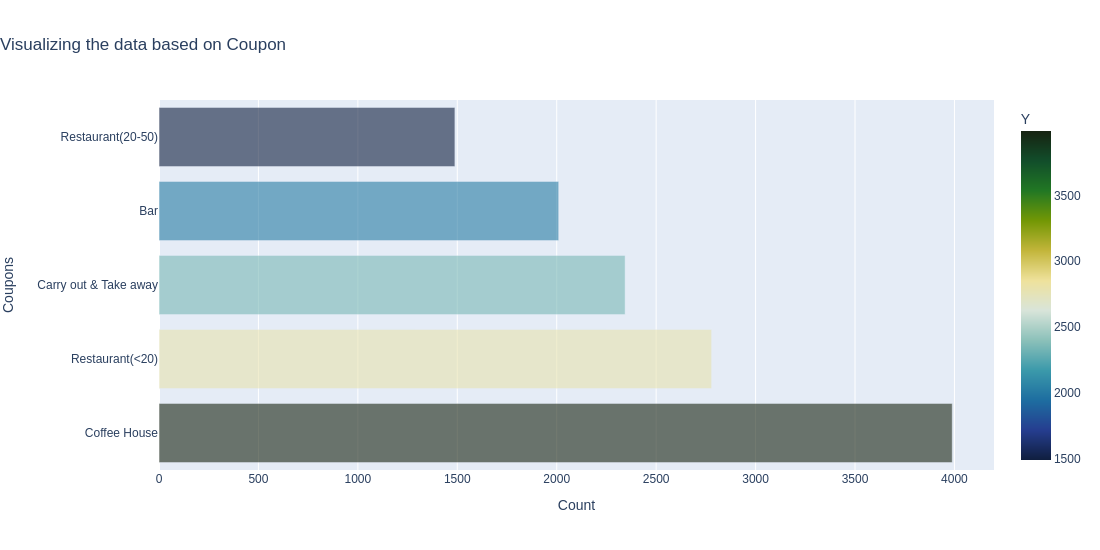

In [26]:
import plotly.express as px

#Plot the entire data against coupon column
fig = px.bar(coupon_data_df,
             x='Y', y= 'coupon',
             color='Y', hover_name='coupon',
             title='Visualizing the data based on Coupon',
             color_continuous_scale=px.colors.diverging.delta
             ).update_traces(opacity=0.6) #px.colors.sequential.xxxxx

#update the layout
fig.update_layout(
                  title_x=0,
                  yaxis_title='Coupons',
                  xaxis_title='Count ',
                  width=1100, height=550
                  ).update_traces(width=0.8)
fig.show("png")

Coffee-house coupons are offered the most followed by cheap restaurants (< $20).

Let's explore some more data from the dataset before we deep dive on any particular column.

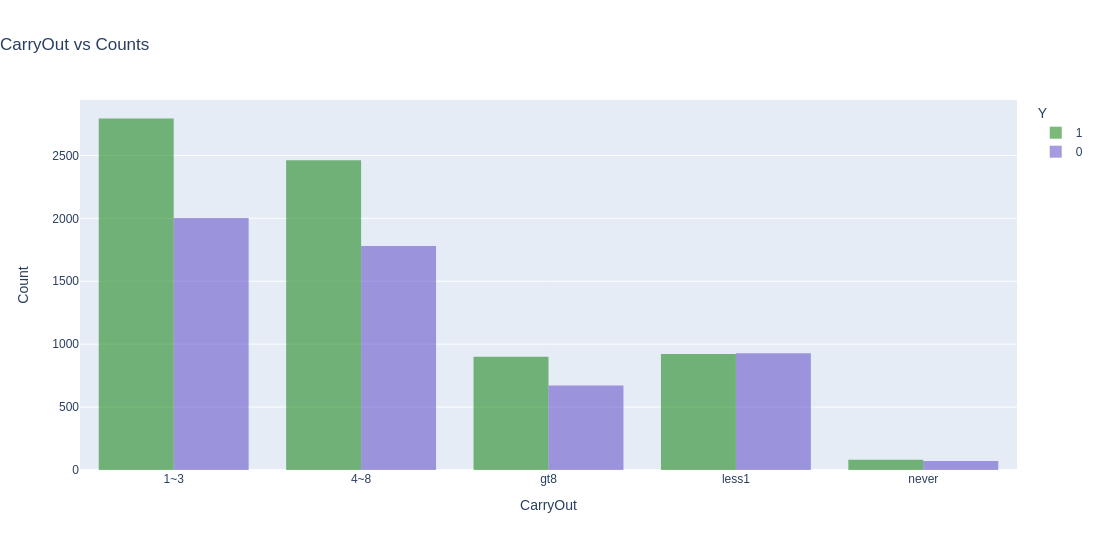

In [27]:
#How is CarryOut acceptance rate?
fig = px.histogram(data, x='CarryOut', color='Y',
                   barmode='group',
                   color_discrete_sequence=['forestgreen','slateblue'],
                   title="CarryOut vs Counts"
                   ).update_traces(opacity=0.6)

fig.update_layout(
                  title_x=0,
                  yaxis_title='Count ',
                  width=1100, height=550
                  )

fig.show("png")

Those who take CarryOuts `1~3` times seems to accept the coupons followed by those who take CarryOuts `4~8` times.


**6. Use a histogram to visualize the temperature column.**

In [28]:
data_temperature = data['temperature'].sort_values().value_counts().reset_index()
data_temperature

,index,temperature
0,80,6475
1,55,3830
2,30,2305


In [29]:
data['temperature'].unique()

array([55, 80, 30])

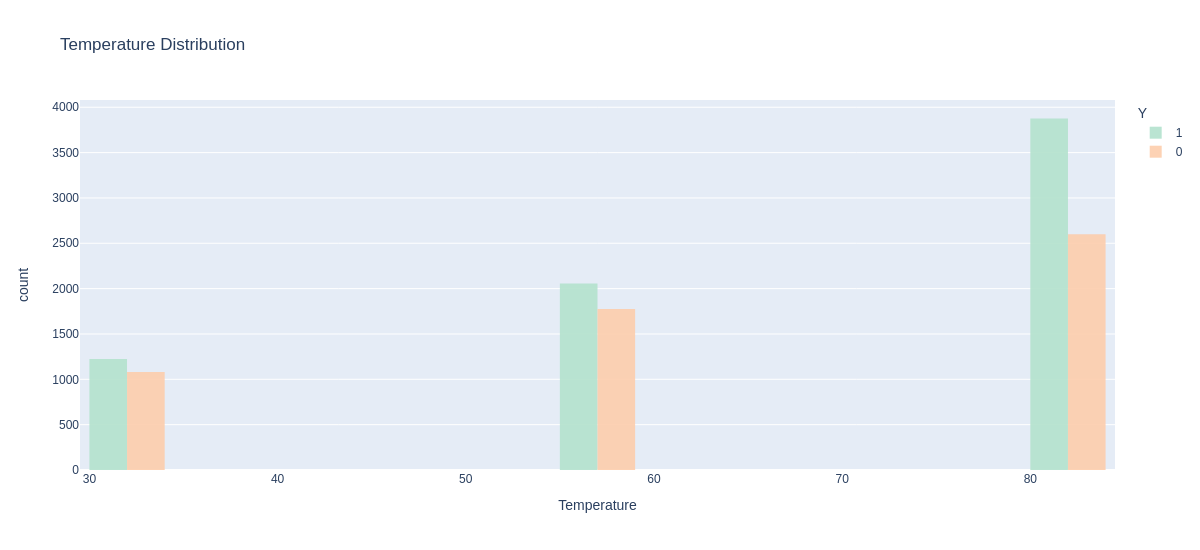

In [30]:
fig = px.histogram(data, x='temperature',
                   color="Y",
                   #text_auto=True, #print the values in the histogram
                   width= 1200,
                   height=550,
                   barmode='group',
                   nbins=12,
                   title = 'Temperature Distribution',
                   labels={'temperature':'Temperature'}, # can specify one label per df column
                   color_discrete_sequence=px.colors.qualitative.Pastel2
                   ).update_traces(opacity=0.9)
fig.show("png")

Our data has mostly high temperatures - 30, 55 and 80. Most coupons were accepted at the highest temperature.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. **Create a new `DataFrame` that contains just the bar coupons.**

In [31]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

The unique values for the `coupon` column are `Restaurant(<20)`, `Coffee House`, `Carry out & Take away`, `Bar` and
       `Restaurant(20-50)`.

In [32]:
df_bar_coupons = data[data['coupon'] == 'Bar']
#df_bar_coupons #dataframe that contains just the bar coupons.

**2. What proportion of bar coupons were accepted?**


In [33]:
bar_coupons_accepted = df_bar_coupons[df_bar_coupons['Y'] == 1] #bar coupons with acceptance of coupon, Y=1
bar_coupons_not_accepted = df_bar_coupons[df_bar_coupons['Y'] == 0] #bar coupons with not acceptance of coupon, Y=0

#Calculate the acceptance/not accepted rate (proportion)
bar_coupon_accepted_percent = len(bar_coupons_accepted) / len(df_bar_coupons)
bar_coupon_notaccepted_percent = len(bar_coupons_not_accepted) / len(df_bar_coupons)

print(f"Proportion of Bar Coupons Acceptance"
      f"\n\nBar Coupons Accepted:\t\t  {bar_coupon_accepted_percent:.2%}"
      f"\nBar Coupons Not Accepted:\t  {bar_coupon_notaccepted_percent:.2%}")

Proportion of Bar Coupons Acceptance

Bar Coupons Accepted:		  41.00%
Bar Coupons Not Accepted:	  59.00%


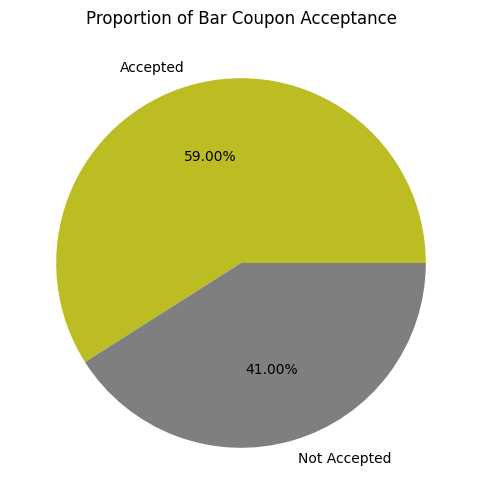

In [34]:
#pie plot showing share of classes
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.pie(df_bar_coupons['Y'].value_counts(),colors = ['tab:olive', 'tab:gray'], labels=['Accepted','Not Accepted'], autopct='%.2f%%')
plt.title("Proportion of Bar Coupon Acceptance")
plt.show()

**3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.**


In [35]:
print(f"As per the data, the frequency at which the drivers went to the bar are : {df_bar_coupons['Bar'].unique()}")
#Since, the proportions are asked mutiple times,
#it makes sense to define a function to calculate the proportion to avoid repetion of code.

As per the data, the frequency at which the drivers went to the bar are : ['never' 'less1' '1~3' 'gt8' '4~8']


In [36]:
#Helper function to calculate Acceptance Rate
def calculate_acceptance_rate(df):

  '''Calculate the acceptance rate (proportion)'''
  accepted = df[df['Y']== 1]
  #not_accepted = df[df['Y']== 0] #uncomment to get not_accepted
  accepted_percent = len(accepted) / len(df)
  #notaccepted_percent = len(not_accepted) / len(df) #uncomment to get not_accepted ratio
  return accepted_percent

In [37]:
low_freq = 'Bar in ("never", "less1", "1~3")'
high_freq = 'Bar in ("gt8", "4~8")'

three_or_less = calculate_acceptance_rate(df_bar_coupons.query(low_freq))
more_than_three = calculate_acceptance_rate(df_bar_coupons.query(high_freq))
print(f"Proportion of Bar Coupons Accepted"
      f"\n\nFrequency of visiting bars\t\t"
      f"\n\nWho went to bar less than three times a month:\t  {three_or_less:.2%}"
      f"\nWho went to bar more than three times a month:\t  {more_than_three:.2%}"
)

Proportion of Bar Coupons Accepted

Frequency of visiting bars		

Who went to bar less than three times a month:	  37.05%
Who went to bar more than three times a month:	  76.88%


**4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?**


In [38]:
print(f"As per the data, the age of drivers in our data are : {df_bar_coupons['age'].unique()}")

As per the data, the age of drivers in our data are : ['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [39]:
age_above25 = 'age in ("46", "26", "31", "41", "50plus", "36")'
bar_more_1_a_month = 'Bar in ("1~3", "gt8", "4~8")'

query = f'{age_above25} and {bar_more_1_a_month}'
other_category = query.replace('in', 'not in')

bar_above25_more_1_a_month = calculate_acceptance_rate(df_bar_coupons.query(query))
others = calculate_acceptance_rate(df_bar_coupons.query(other_category))
print(f"Proportion of Bar Coupons Accepted"
      f"\n\nFrequency of visiting bars > 1 per Month \t\t"
      f"\n\nAge > 25:\t\t{bar_above25_more_1_a_month:.2%}"
      f"\nOthers:\t\t\t{others:.2%}"
)

Proportion of Bar Coupons Accepted

Frequency of visiting bars > 1 per Month 		

Age > 25:		69.52%
Others:			39.33%


Yes, there is a difference in the ratio of drivers visiting the bar more than once a month with age > 25 and others.

**5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**


In [40]:
print("Drivers were either with : ", df_bar_coupons['passenger'].unique())

Drivers were either with :  ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']


In [41]:
print("The occupation of the drivers were: ", df_bar_coupons['occupation'].unique())

The occupation of the drivers were:  ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [42]:
passenger_nokids = "passenger not in ('Kid(s)')" # passengers that were not a kid
not_farm_fish_forestry = "occupation not in ('Farming Fishing & Forestry')" # occupations other than farming, fishing, or forestry
bar_more_1_a_month = 'Bar in ("1~3", "gt8", "4~8")' # go to bars more than once a month

query = f'{bar_more_1_a_month} and {passenger_nokids} and {not_farm_fish_forestry}' #drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
other_category = query.replace("in", "not in").replace("not not in", "not in") # Other category

nokids_and_farm_fish_forestry = calculate_acceptance_rate(df_bar_coupons.query(query))
others = calculate_acceptance_rate(df_bar_coupons.query(other_category))
print(f"Proportion of Bar Coupons Accepted"
      f"\n\nFrequency of visiting bars > 1 per Month\t\t"
      f"\n\nWith no kids and occupation not in Farm, Fish & Forestry:\t{nokids_and_farm_fish_forestry:.2%}"
      f"\nOthers:\t\t\t\t\t\t\t\t{others:.2%}"
)

Proportion of Bar Coupons Accepted

Frequency of visiting bars > 1 per Month		

With no kids and occupation not in Farm, Fish & Forestry:	71.32%
Others:								30.92%


6. **Compare the acceptance rates between those drivers who:**

- **go to bars more than once a month, had passengers that were not a kid, and were not widowed** *OR*
- **go to bars more than once a month and are under the age of 30** *OR*
- **go to cheap restaurants more than 4 times a month and income is less than 50K**



In [43]:
df_bar_coupons['maritalStatus'].unique() # What are unique values of maritalStatus?

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [44]:
df_bar_coupons['income'].unique() # What range of income does the dataset have?

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [45]:
df_bar_coupons['RestaurantLessThan20'].unique() #

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [46]:

not_widowed = "maritalStatus not in ('Widowed')"
age_under30 = "age not in ('21', '26', 'below21')"
lessthan_50K = "income not in ('$50000 - $62499', '$25000 - $37499','$100000 or More', '$87500 - $99999', 'Less than $12500')"
goes_cheap_restaurant4pm = 'RestaurantLessThan20 not in ("never", "less1", "1~3")'
bar_more_1_a_month = 'Bar in ("1~3", "gt8", "4~8")'
passenger_nokids = "passenger not in ('Kid(s)')"

query1 = f'{bar_more_1_a_month} and {passenger_nokids} and {not_widowed}'
#print(query1)
query2 = f'{bar_more_1_a_month} and {age_under30}'
#print(query2)
query3 = f'{goes_cheap_restaurant4pm} and {lessthan_50K}'
#print(query3)

##Uncomment below, for the not accepted proportions.
# query1_others = query1.replace("in", "not in").replace("not not in", "in")
# print(query1_others)
# query2_others = query2.replace("in", "not in").replace("not not in", "in")
# print(query2_others)
# query3_others = query3.replace("in", "not in").replace("not not in", "in").replace("not income", "income")
# print(query3_others)

goes2bar1pm_nokids_not_widowed = calculate_acceptance_rate(df_bar_coupons.query(query1))
goes2bar1pm_age_under30 = calculate_acceptance_rate(df_bar_coupons.query(query2))
goes_cheap_restaurant4pm_incomeless50K = calculate_acceptance_rate(df_bar_coupons.query(query3))

##Uncomment below, for the not accepted proportions.
# goes2bar1pm_nokids_not_widowed_oth = calculate_acceptance_rate(df_bar_coupons.query(query1_others))
# goes2bar1pm_age_under30_oth = calculate_acceptance_rate(df_bar_coupons.query(query2_others))
# goes_cheap_restaurant4pm_incomeless50K_oth = calculate_acceptance_rate(df_bar_coupons.query(query3_others))
print(f"Proportion of Bar Coupons Accepted"
      f"\n\nBar visit per Month > 1, No kids as passengers, Not Widowed:\t\t{goes2bar1pm_nokids_not_widowed:.2%}"
      f"\nBar visit per Month > 1, Age < 30:\t\t\t\t\t{goes2bar1pm_age_under30:.2%}"
      f"\nCheap Restaurant visit per Month > 4, Income < 50K:\t\t\t{goes_cheap_restaurant4pm_incomeless50K:.2%}"
)


Proportion of Bar Coupons Accepted

Bar visit per Month > 1, No kids as passengers, Not Widowed:		71.32%
Bar visit per Month > 1, Age < 30:					64.14%
Cheap Restaurant visit per Month > 4, Income < 50K:			41.52%


**7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?**

- Coffee-house coupons are offered the most followed by cheap restaurants (< $20).
- Most coupons were accepted at the highest temperature.
- Bar Coupons Acceptance has an acceptance rate of 41% and a non-acceptance rate of 59%. That means, there are slightly more chances of bar coupons getting not accepted in comparison to getting accepted.
- Bar coupons were accepted by those who went to the bar more than three times a month. (77% acceptance rate).
- Bar coupons were accepted by drivers with ages greater than 25 and who visited the bar more than once a month than others. (69.5% acceptance rate)
- Bar coupons were accepted by drivers who had no kids as passengers, didn't work in Farming Fishing, or forestry, and went to the bar more than once a month in comparison to others. (71% acceptance rate)
- Drivers who visited the bar more than once a month had no kids as passengers and were not windowed and had a 71% coupon acceptance rate.
- Drivers who visited the bar more than once a month, and have an age less than 30 years, had a 64% coupon acceptance rate.
- Drivers who visited a cheap restaurant more than four times a month, and had income less than 50K, had a 41% coupon acceptance rate.




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Since, from our earlier analysis, **`CoffeeHouse`** coupons are distributed the most. Let's deep dive and understand more on `CoffeeHouse` coupons.

In [47]:
df_coffeehouse_coupons = data[data['coupon'] == 'Coffee House']
#df_coffeehouse_coupons #dataframe that contains just the bar coupons.

**1. What is the total acceptance and rejection ratios of total `Coffee House` coupons?**

In [48]:
coffeehouse_coupons_accepted = df_coffeehouse_coupons[df_coffeehouse_coupons['Y'] == 1] #bar coupons with acceptance of coupon, Y=1
coffeehouse_coupons_not_accepted = df_coffeehouse_coupons[df_coffeehouse_coupons['Y'] == 0] #bar coupons with not acceptance of coupon, Y=0

#Calculate the acceptance/not accepted rate (proportion)
coffeehouse_coupon_accepted_percent = len(coffeehouse_coupons_accepted) / len(df_coffeehouse_coupons)
coffeehouse_coupon_notaccepted_percent = len(coffeehouse_coupons_not_accepted) / len(df_coffeehouse_coupons)

print(f"Proportion of Coffeehouse Coupons Acceptance"
      f"\n\nCoffeeHouse Coupons Accepted:\t\t  {coffeehouse_coupon_accepted_percent:.2%}"
      f"\nCoffeeHouse Coupons Not Accepted:\t  {coffeehouse_coupon_notaccepted_percent:.2%}")

Proportion of Coffeehouse Coupons Acceptance

CoffeeHouse Coupons Accepted:		  49.86%
CoffeeHouse Coupons Not Accepted:	  50.14%


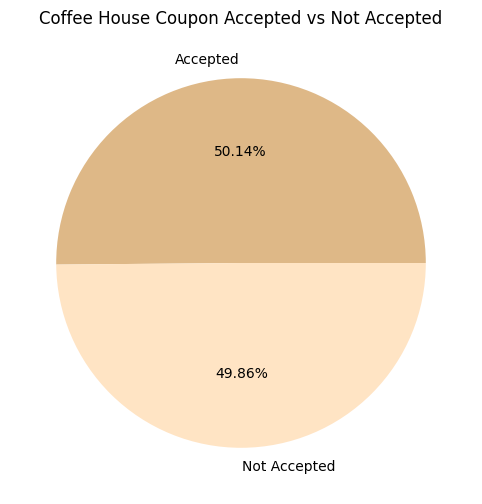

In [49]:
#pie plot
plt.figure(figsize=(10,6))
plt.pie(df_coffeehouse_coupons.Y.value_counts(),colors = ['burlywood', 'bisque'], labels=['Accepted','Not Accepted'], autopct='%.2f%%')
plt.title("Coffee House Coupon Accepted vs Not Accepted")
plt.show()

We see that there is a ~50% acceptance and ~50% rejections for Coffee House coupons.

**2. Did the driver accepted the Coffee House coupon when accompanied with kids, friends, partner or alone?**

In [50]:
passenger_withkid = "passenger in ('Kid(s)')" # drivers accompanied with kids
passenger_withfriend = "passenger in ('Friend(s)')" # drivers accompanied with friends
passenger_withpartner = "passenger in ('Partner')" # drivers accompanied with Partner
passenger_alone = "passenger in ('Alone')" #Driving alone


withkid = calculate_acceptance_rate(df_coffeehouse_coupons.query(passenger_withkid))
withfriend = calculate_acceptance_rate(df_coffeehouse_coupons.query(passenger_withfriend))
withpartner = calculate_acceptance_rate(df_coffeehouse_coupons.query(passenger_withpartner))
alone = calculate_acceptance_rate(df_coffeehouse_coupons.query(passenger_alone))

print(f"Proportion of Coffee House Coupons Accepted"
      f"\n\nPassenger with Kid(s):\t\t\t\t{withkid:.2%}"
      f"\nPassenger with Friend(s):\t\t\t{withfriend:.2%}"
      f"\nPassenger with Partner:\t\t\t\t{withpartner:.2%}"
      f"\nPassenger alone:\t\t\t\t{alone:.2%}"
)

Proportion of Coffee House Coupons Accepted

Passenger with Kid(s):				48.06%
Passenger with Friend(s):			59.62%
Passenger with Partner:				56.91%
Passenger alone:				43.76%


From the data, it is more likely that the driver will accept the Coffee House coupon when they have a 'friend(s)' with them (59% acceptance rate), followed by when driving with 'Partner' (57 % acceptance rate).

**3. Does Male or Female drivers accept the Coffee House coupons more?**

In [51]:
df_coffeehouse_coupons['gender'].value_counts()

Female    2048
Male      1941
Name: gender, dtype: int64

In [52]:
ismale = "gender in ('Male')"
isfemale = "gender in ('Female')"

is_male = calculate_acceptance_rate(df_coffeehouse_coupons.query(ismale))
is_female = calculate_acceptance_rate(df_coffeehouse_coupons.query(isfemale))

print(f"Proportion of Coffee House Coupons Accepted"
      f"\n\nDriver is Male:\t\t\t\t{is_male:.2%}"
      f"\nDriver is Female:\t\t\t{is_female:.2%}"
)

Proportion of Coffee House Coupons Accepted

Driver is Male:				50.59%
Driver is Female:			49.17%


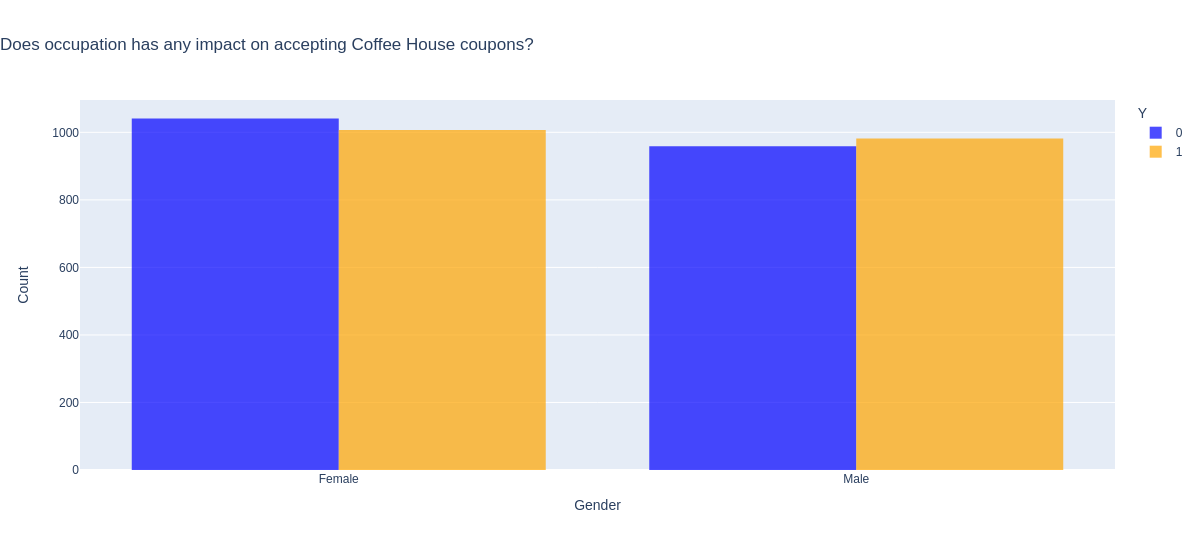

In [53]:
fig = px.histogram(df_coffeehouse_coupons, x='gender', color='Y',
                   barmode='group',
                   #text_auto=True,
                   color_discrete_sequence=['blue','orange'],
                   labels={'gender': 'Gender'},
                   title="Does occupation has any impact on accepting Coffee House coupons?"
                   ).update_traces(opacity=0.7)

fig.update_layout(
                  title_x=0,
                  yaxis_title='Count ',
                  width=1200, height=550
                  )

fig.show("png")

Male drivers seem to accept the Coffee House coupons slightly more percent (51%) than Females (49%).

**4. Does age of the driver has any significance in accepting the Coffee House coupons?**

In [54]:
df_coffeehouse_coupons['age'].value_counts()

21         883
26         843
31         620
50plus     545
36         402
41         325
46         216
below21    155
Name: age, dtype: int64

In [55]:
less_than25 = "age in ('21', 'below21')" #age below 25
age_25_40 = "age in ('26', '31', '36')" # age between 25 and 40
above_40 = "age in ('41', '46', '50plus')" # age above 40

is_less_than25 = calculate_acceptance_rate(df_coffeehouse_coupons.query(less_than25))
is_age_25_40 = calculate_acceptance_rate(df_coffeehouse_coupons.query(age_25_40))
is_above_40 = calculate_acceptance_rate(df_coffeehouse_coupons.query(above_40))

print(f"Proportion of Coffee House Coupons Accepted"
      f"\n\nDriver is Less than 25:\t\t\t\t{is_less_than25:.2%}"
      f"\nDriver is between 25 and 40:\t\t\t{is_age_25_40:.2%}"
      f"\nDriver is above 40:\t\t\t\t{is_above_40:.2%}"
)

Proportion of Coffee House Coupons Accepted

Driver is Less than 25:				55.01%
Driver is between 25 and 40:			49.12%
Driver is above 40:				46.22%


From the data, it is significant that drivers Age < 25 accept the Coffee House coupons (55%), followed by drivers Between 25 and 40 (49%).

**5. What is the impact of occupation on acceptance of Coffee House coupons?**

In [56]:
df_coffeehouse_coupons['occupation'].value_counts()

Unemployed                                   570
Student                                      499
Computer & Mathematical                      446
Sales & Related                              355
Education&Training&Library                   296
Management                                   294
Arts Design Entertainment Sports & Media     209
Office & Administrative Support              197
Retired                                      164
Business & Financial                         146
Food Preparation & Serving Related            83
Transportation & Material Moving              76
Community & Social Services                   74
Healthcare Practitioners & Technical          74
Legal                                         69
Healthcare Support                            65
Architecture & Engineering                    63
Life Physical Social Science                  61
Protective Service                            58
Personal Care & Service                       50
Construction & Extra

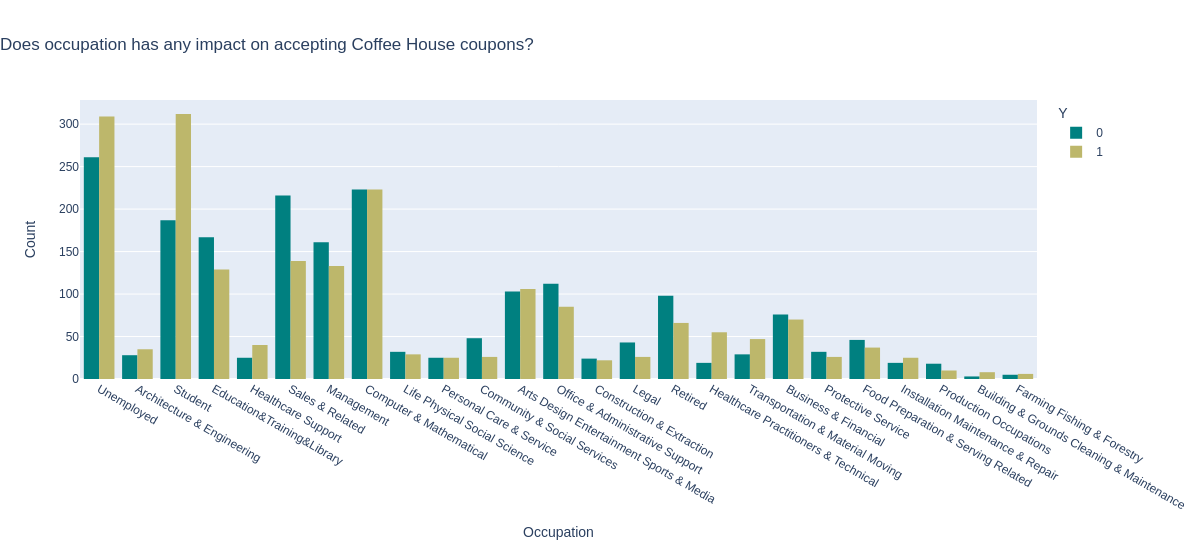

In [57]:
fig = px.histogram(df_coffeehouse_coupons, x='occupation', color='Y',
                   barmode='group',
                   color_discrete_sequence=['teal','darkkhaki'],
                   labels={'occupation': 'Occupation'},
                   title="Does occupation has any impact on accepting Coffee House coupons?"
                   )

fig.update_layout(
                  title_x=0,
                  yaxis_title='Count ',
                  width=1200, height=550
                  )

fig.show("png")

It is clear from the visualization that occupation does have a great impact on accepting the coupons. From the viz, 'Students' accept the most coupons, followed by 'Unemployed'.

Observations on the data:
- People are accepting Cheap restaurants and carry-out coupons.
- Bar coupons are accepted, as we would expect.
- Bar Coupon acceptance is most common if people are with friends or partners.
- For expensive restaurants, people are not accepting coupons. People accept cheap restaurant coupons more.
- For Coffee House coupons, the acceptance and rejection rate is almost equal.
Coupons should be sent in the evenings.



